<a href="https://colab.research.google.com/github/rishabh422tiwari/MLP-Language-Model/blob/main/2.MLP_language_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figure
%matplotlib inline

In [ ]:
# read in all the words
words = open('names.txt').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
# build the vocabulary of characters and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# build the dataset               first five example

block_size = 3  # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:

  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [ ]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
C = torch.randn((27,2))

In [ ]:
C

tensor([[-0.5300,  0.9214],
        [-0.0322, -0.3420],
        [ 0.6079, -1.7622],
        [-1.3858, -0.0878],
        [ 0.5111,  0.7423],
        [-0.1326, -1.6317],
        [ 0.2726,  0.3399],
        [ 0.5822, -0.5434],
        [ 0.4216,  0.3385],
        [ 0.7720,  1.9472],
        [ 0.2388,  0.0255],
        [-1.5791,  0.1018],
        [ 0.3560,  0.3165],
        [-0.4487,  1.4295],
        [-1.1362, -0.1069],
        [ 0.3253,  0.0485],
        [-0.5483, -1.0262],
        [-2.3383,  0.5154],
        [-0.9863, -1.7796],
        [ 0.2868, -0.1935],
        [-0.0207, -2.2056],
        [-1.1722,  1.5238],
        [-0.2361, -0.1660],
        [ 1.4710, -0.2763],
        [-0.7373, -0.0963],
        [-0.6910, -0.5308],
        [ 0.6895,  1.4781]])

In [ ]:
C[5]

tensor([-0.1326, -1.6317])

In [ ]:
#F.one_hot(torch.tensor(5), num_classes=27).float() @ C     achieving the same results but indexing is faster.

In [ ]:
C[torch.tensor([5,6,7,7,7,7,])]

tensor([[-0.1326, -1.6317],
        [ 0.2726,  0.3399],
        [ 0.5822, -0.5434],
        [ 0.5822, -0.5434],
        [ 0.5822, -0.5434],
        [ 0.5822, -0.5434]])

In [ ]:
C[X].shape

torch.Size([32, 3, 2])

In [ ]:
X[13,2]

tensor(1)

In [ ]:
print(C[X])

tensor([[[-0.5300,  0.9214],
         [-0.5300,  0.9214],
         [-0.5300,  0.9214]],

        [[-0.5300,  0.9214],
         [-0.5300,  0.9214],
         [-0.1326, -1.6317]],

        [[-0.5300,  0.9214],
         [-0.1326, -1.6317],
         [-0.4487,  1.4295]],

        [[-0.1326, -1.6317],
         [-0.4487,  1.4295],
         [-0.4487,  1.4295]],

        [[-0.4487,  1.4295],
         [-0.4487,  1.4295],
         [-0.0322, -0.3420]],

        [[-0.5300,  0.9214],
         [-0.5300,  0.9214],
         [-0.5300,  0.9214]],

        [[-0.5300,  0.9214],
         [-0.5300,  0.9214],
         [ 0.3253,  0.0485]],

        [[-0.5300,  0.9214],
         [ 0.3253,  0.0485],
         [ 0.3560,  0.3165]],

        [[ 0.3253,  0.0485],
         [ 0.3560,  0.3165],
         [ 0.7720,  1.9472]],

        [[ 0.3560,  0.3165],
         [ 0.7720,  1.9472],
         [-0.2361, -0.1660]],

        [[ 0.7720,  1.9472],
         [-0.2361, -0.1660],
         [ 0.7720,  1.9472]],

        [[-0.2361, -0

In [ ]:
X[13,2]                 # our list

tensor(1)

In [ ]:
C[X][13,2]               # word embedding vector for integer 1

tensor([-0.0322, -0.3420])

In [ ]:
C[1]                      # we can check the embedding vector for integer 1

tensor([-0.0322, -0.3420])

In [ ]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [ ]:
emb @ W1 + b1             # emb is [32,3,2] and W1 is [6,100] cannot be multiplied

RuntimeError: ignored

In [ ]:
emb[:,0,:]

tensor([[-0.5300,  0.9214],
        [-0.5300,  0.9214],
        [-0.5300,  0.9214],
        [-0.1326, -1.6317],
        [-0.4487,  1.4295],
        [-0.5300,  0.9214],
        [-0.5300,  0.9214],
        [-0.5300,  0.9214],
        [ 0.3253,  0.0485],
        [ 0.3560,  0.3165],
        [ 0.7720,  1.9472],
        [-0.2361, -0.1660],
        [-0.5300,  0.9214],
        [-0.5300,  0.9214],
        [-0.5300,  0.9214],
        [-0.0322, -0.3420],
        [-0.5300,  0.9214],
        [-0.5300,  0.9214],
        [-0.5300,  0.9214],
        [ 0.7720,  1.9472],
        [ 0.2868, -0.1935],
        [-0.0322, -0.3420],
        [ 0.6079, -1.7622],
        [-0.1326, -1.6317],
        [ 0.3560,  0.3165],
        [-0.5300,  0.9214],
        [-0.5300,  0.9214],
        [-0.5300,  0.9214],
        [ 0.2868, -0.1935],
        [ 0.3253,  0.0485],
        [-0.5483, -1.0262],
        [ 0.4216,  0.3385]])

In [ ]:
torch.cat([emb[:,0,:], emb[:,1,:],emb[:,0,:]], 1)

tensor([[-0.5300,  0.9214, -0.5300,  0.9214, -0.5300,  0.9214],
        [-0.5300,  0.9214, -0.5300,  0.9214, -0.5300,  0.9214],
        [-0.5300,  0.9214, -0.1326, -1.6317, -0.5300,  0.9214],
        [-0.1326, -1.6317, -0.4487,  1.4295, -0.1326, -1.6317],
        [-0.4487,  1.4295, -0.4487,  1.4295, -0.4487,  1.4295],
        [-0.5300,  0.9214, -0.5300,  0.9214, -0.5300,  0.9214],
        [-0.5300,  0.9214, -0.5300,  0.9214, -0.5300,  0.9214],
        [-0.5300,  0.9214,  0.3253,  0.0485, -0.5300,  0.9214],
        [ 0.3253,  0.0485,  0.3560,  0.3165,  0.3253,  0.0485],
        [ 0.3560,  0.3165,  0.7720,  1.9472,  0.3560,  0.3165],
        [ 0.7720,  1.9472, -0.2361, -0.1660,  0.7720,  1.9472],
        [-0.2361, -0.1660,  0.7720,  1.9472, -0.2361, -0.1660],
        [-0.5300,  0.9214, -0.5300,  0.9214, -0.5300,  0.9214],
        [-0.5300,  0.9214, -0.5300,  0.9214, -0.5300,  0.9214],
        [-0.5300,  0.9214, -0.0322, -0.3420, -0.5300,  0.9214],
        [-0.0322, -0.3420, -0.2361, -0.1

In [ ]:
torch.cat([emb[:,0,:], emb[:,1,:],emb[:,0,:]], 1).shape

torch.Size([32, 6])

In [ ]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [ ]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
a.shape

torch.Size([18])

In [ ]:
a.view(3,3,2)           # view in any dimention as long as product is 18

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

always represented in memory in 1 dimension vector but when view is called we are manupilating some attributes og that tensor that dictate how this 1-d seq is interpreted to be in an n-dim tensor.

**No memory is being changed, copied, moved or created while using *.view***

In [ ]:
a.storage()                                 

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
emb.shape

torch.Size([32, 3, 2])

In [ ]:
emb.view(32, 6)

tensor([[-0.5300,  0.9214, -0.5300,  0.9214, -0.5300,  0.9214],
        [-0.5300,  0.9214, -0.5300,  0.9214, -0.1326, -1.6317],
        [-0.5300,  0.9214, -0.1326, -1.6317, -0.4487,  1.4295],
        [-0.1326, -1.6317, -0.4487,  1.4295, -0.4487,  1.4295],
        [-0.4487,  1.4295, -0.4487,  1.4295, -0.0322, -0.3420],
        [-0.5300,  0.9214, -0.5300,  0.9214, -0.5300,  0.9214],
        [-0.5300,  0.9214, -0.5300,  0.9214,  0.3253,  0.0485],
        [-0.5300,  0.9214,  0.3253,  0.0485,  0.3560,  0.3165],
        [ 0.3253,  0.0485,  0.3560,  0.3165,  0.7720,  1.9472],
        [ 0.3560,  0.3165,  0.7720,  1.9472, -0.2361, -0.1660],
        [ 0.7720,  1.9472, -0.2361, -0.1660,  0.7720,  1.9472],
        [-0.2361, -0.1660,  0.7720,  1.9472, -0.0322, -0.3420],
        [-0.5300,  0.9214, -0.5300,  0.9214, -0.5300,  0.9214],
        [-0.5300,  0.9214, -0.5300,  0.9214, -0.0322, -0.3420],
        [-0.5300,  0.9214, -0.0322, -0.3420, -0.2361, -0.1660],
        [-0.0322, -0.3420, -0.2361, -0.1

In [ ]:
emb.view(32, 6) == torch.cat([emb[:,0,:], emb[:,1,:],emb[:,0,:]], 1)   # element wise equal

tensor([[ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True, False, False],
        [ True,  True,  True,  True, False, False],
        [ True,  True,  True,  True, False, False],
        [ True,  True,  True,  True, False, False],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True, False, False],
        [ True,  True,  True,  True, False, False],
        [ True,  True,  True,  True, False, False],
        [ True,  True,  True,  True, False, False],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True, False, False],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True, False, False],
        [ True,  True,  True,  True, False, False],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True, False, False],
        [ True,  True,  True,  True, False, False],
        [ Tr

In [ ]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1  + b1)                      # for 5 example .view(32,6) is equal to emb,shape[0]
# h = emb.view(-1,6) @ W1  + b1     

In [ ]:
h

tensor([[ 0.9949, -0.9078,  0.9243,  ...,  0.9916,  0.7854, -0.9214],
        [ 0.9768, -0.1668,  0.9391,  ...,  0.9174,  0.8820,  0.3725],
        [ 0.8532, -0.9551,  0.9998,  ..., -0.9334,  0.6479, -0.9786],
        ...,
        [ 0.5579, -0.5737,  0.9980,  ..., -0.8135,  0.9713,  0.9155],
        [-0.1843,  0.0541, -0.9230,  ..., -0.9158,  0.9972,  0.8321],
        [ 0.9951, -0.0557, -0.9513,  ...,  1.0000,  0.9952, -0.9972]])

In [ ]:
h.shape            # 100 dim activation for every one of our example

torch.Size([32, 100])

In [ ]:
b1.shape

torch.Size([100])

In [ ]:
# 32, 100               32, 100              32, 100
#     100     --->       1, 100     --->     32, 100

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
logits

tensor([[-4.2021e+00, -1.7967e+01, -6.4227e+00,  2.5521e+00,  2.5003e+00,
         -6.2784e+00,  9.8299e+00,  3.3410e+00,  4.9490e-01,  1.5987e+01,
          4.0086e+00,  5.3250e+00, -1.6099e+01,  4.2966e+00, -4.7679e+00,
          9.1273e-01,  6.7078e+00,  1.5156e+00,  1.6112e+00,  6.5366e+00,
         -1.3141e+01, -6.4404e+00, -5.9230e+00, -2.8120e+00,  5.1827e+00,
          4.6969e+00, -6.3267e+00],
        [-9.3000e-01, -1.1816e+01, -3.6583e+00, -1.9101e+00,  1.4855e+01,
         -7.5954e+00, -3.2717e+00, -7.5276e-01,  1.3877e+00,  1.7189e+00,
          5.2699e+00, -4.9576e-01, -1.9645e+01, -3.5914e-02,  8.6987e+00,
         -4.8383e+00,  6.8015e+00,  1.5518e+00, -1.8959e+00, -2.3064e+00,
         -8.6104e+00, -8.2389e+00,  4.4633e+00,  9.6227e+00, -5.7255e+00,
          1.1553e+00, -8.5722e+00],
        [ 5.8845e+00, -2.3694e+00, -1.0048e+00,  3.5083e+00,  2.6669e-01,
         -1.5531e+01, -4.6088e+00,  7.1725e+00, -1.3443e+01, -2.1065e+00,
         -1.7998e+00,  8.0605e+00,  1.99

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts / counts.sum(1, keepdims = True)

In [ ]:
prob.shape

torch.Size([32, 27])

In [ ]:
prob[0].sum()

tensor(1.0000)

In [ ]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(16.4874)

In [ ]:
prob[torch.arange(32), Y]

tensor([2.1350e-10, 3.3846e-07, 2.1151e-15, 1.5143e-05, 1.0025e-07, 2.8344e-07,
        1.5104e-12, 1.0266e-03, 1.0865e-14, 2.2283e-05, 6.7170e-15, 8.4179e-15,
        1.7906e-15, 2.2197e-05, 1.5004e-09, 1.9409e-08, 9.9764e-01, 8.4400e-04,
        2.9554e-11, 5.2174e-04, 3.1502e-10, 1.4586e-02, 9.9910e-01, 3.4516e-05,
        1.3690e-09, 7.8498e-05, 7.3237e-06, 1.0848e-04, 3.5340e-05, 6.9169e-08,
        1.1597e-05, 9.1587e-12])

In [ ]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
Y 

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
# ------------ now made respectable :) ---------------

In [ ]:
X.shape, Y.shape # dataset

(torch.Size([32, 3]), torch.Size([32]))

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters) # number of parameters in total

6881

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
for _ in range(1000):   
    # Forward Pass
    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims =True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y)             # exact same thing as above 3 line
    # Backward Pass
    for p in parameters:
      p.grad = None
    loss.backward()

    # Update
    for p in parameters:
      p.data += -0.1 * p.grad
print(loss.item())

0.25322437286376953


In [ ]:
logits.max(1)

torch.return_types.max(
values=tensor([ 9.5901, 13.7441, 18.2820, 25.2509, 18.7557,  9.5901, 16.0939, 22.5055,
        15.1233, 23.8861, 14.7866, 20.1084,  9.5901, 17.4110, 20.2590, 14.9805,
         9.5901, 17.3584, 19.2615, 14.1928, 14.3030, 10.6854, 18.5600, 17.8931,
        17.8410,  9.5901, 17.4807, 18.3298, 11.5068, 18.5497, 22.2679, 18.9302],
       grad_fn=<MaxBackward0>),
indices=tensor([ 1, 13, 13,  1,  0,  1, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  1, 19,
         1,  2,  5, 12, 12,  1,  0,  1, 15, 16,  8,  9,  1,  0]))

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

Why you should use .cross_entropy :
* **Forward pass can be much more efficient**: when you run cross_entropy pytorch will not create all these intermediate tensors coz all these are new tensors in memory so these are fairly inefficient. instead pytroch will clustored up all these operations and very often use fused kernels that very efficiently evaluate expressions.

* Backward pass can made much more efficient ( mathematically and analytically.
* Things can be much more numerically well behaved 

In [ ]:
logits = torch.tensor([-100, -3, 0, 5])                # [-2, -3, 0, 5] suppose we put 100 in place of -2
counts = logits.exp()                                  # nothing would really change
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 3.3311e-04, 6.6906e-03, 9.9298e-01])

In [ ]:
logits = torch.tensor([-100, -3, 0, 100])              # but because how exp function works if you have very 
counts = logits.exp()                                  # positive logits you will get nan
probs = counts / counts.sum()
probs

tensor([0., 0., 0., nan])

In [ ]:
counts     # reason is you 'inf' in your counts i.e e^100 we ran out of dynamic range on this floating count number


tensor([3.7835e-44, 4.9787e-02, 1.0000e+00,        inf])

the way pytorch solve this,because of the normalization you can offset the logits by any arbitray constant value that you want

what pytorch does is it calculates internally the maximum value that occurs in a logits and it subtracts it.

In [ ]:
logits = torch.tensor([-5, -3, 0, 100]) - 100             # -ve numbers are okay but +ve numbers can overflow this .exp
counts = logits.exp()                                 
probs = counts / counts.sum()
probs                                                     # now this will work

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [ ]:
torch.randint(0, 4, (32,))

tensor([3, 0, 2, 2, 0, 3, 1, 1, 0, 1, 1, 0, 2, 3, 3, 0, 0, 2, 3, 1, 2, 0, 0, 0,
        1, 2, 0, 1, 1, 1, 2, 0])

In [ ]:
torch.randint(0, X.shape[0], (32,))

tensor([20,  5, 12, 24,  8,  2,  8,  4, 22, 14, 11, 14, 24,  1, 30,  9, 21, 26,
         1, 19, 16, 16,  1, 24, 24, 28, 15,  4, 27, 17, 22,  9])

# Doing for the procces on whole dataset

In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [ ]:
len(words)

32033

In [ ]:
n1

25626

In [ ]:
n2

28829

In [ ]:
n2 - n1 

3203

In [ ]:
len(words) - n2

3204

In [ ]:
Xtr.shape, Ytr.shape

(torch.Size([182437, 3]), torch.Size([182437]))

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0,1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):   

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # Forward Pass
    emb = C[Xtr[ix]]         #(32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix]) 
   #
           
    # Backward Pass
    for p in parameters:
      p.grad = None
    loss.backward()

    # Update
    # lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01   # 10**-1
    for p in parameters:
      p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
#print(loss.item())

In [ ]:
print(loss.item())

2.154421329498291


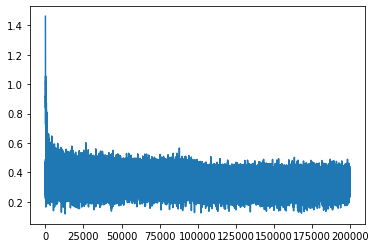

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1109, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1781, grad_fn=<NllLossBackward0>)

In [ ]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

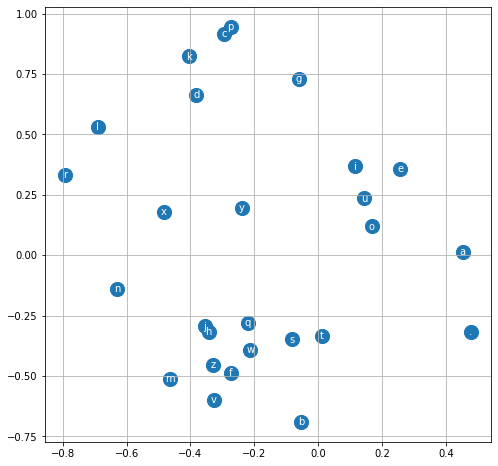

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

Training split : used to optimize or train the parameters in the model

Dev/val split : used to optimize or train the hyper-parameters of the model      ( size of the hidden layers, size of the embedding)

test plit : used to evaluate the model 

In [ ]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmah.
aalyn.
killim.
shreetleenanden.
jazhunna.
perric.
kaeli.
nellara.
chaiir.
kaleigh.
ham.
pris.
quint.
suline.
liveni.
wavero.
dearynn.
jaxen.
durathey.
ediia.
